In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('2_less_used_result.csv')


In [18]:
df = df[~df['status'].isin(['false_motion', 'idle'])]
df.reset_index(drop=True, inplace=True)



In [19]:
len(df)

24886

In [20]:
from datetime import datetime, timedelta

total_rows = df.shape[0]

# Define percentage distribution for each day
distribution = [0.30, 0.10, 0.20, 0.05, 0.05, 0.15, 0.15]

# Calculate rows for each day
rows_per_day = [int(total_rows * percent) for percent in distribution]

while sum(rows_per_day) < total_rows:
    rows_per_day[0] += 1 


In [21]:
# Generate timestamps for each day
now = datetime.now()
timestamps = []
row_counter = 0

for i, rows in enumerate(rows_per_day):
    start_time = now - timedelta(days=i)
    for j in range(rows):
        timestamps.append(start_time - timedelta(seconds=j))
        row_counter += 1

# Assign to DataFrame
df['timestamp'] = timestamps[:total_rows]

In [22]:
df.head()

,x,y,z,status,magnitude,rolling_mean,rolling_std,rolling_max,rolling_min,encoded_status,estimated_status,timestamp
0,1.219077,1.663839,1.911732,used,0.818827,0.970321,-0.591143,-0.448047,0.824443,2,2,2025-01-04 20:19:45.809371
1,1.357358,1.261998,2.408094,used,2.475637,1.909371,-0.099009,1.020973,0.916842,2,2,2025-01-04 20:19:44.809371
2,1.201473,1.140877,1.687566,used,-0.844946,1.583596,0.116395,1.020973,0.450956,2,2,2025-01-04 20:19:43.809371
3,1.681251,1.184432,1.047077,used,0.501345,1.597076,0.116164,1.020973,0.450956,2,2,2025-01-04 20:19:42.809371
4,1.592753,1.789187,1.312805,used,1.564257,2.222264,0.101516,1.020973,0.450956,2,2,2025-01-04 20:19:41.809371


In [23]:
df = df.sort_values(by='timestamp')
df.reset_index(drop=True, inplace=True)


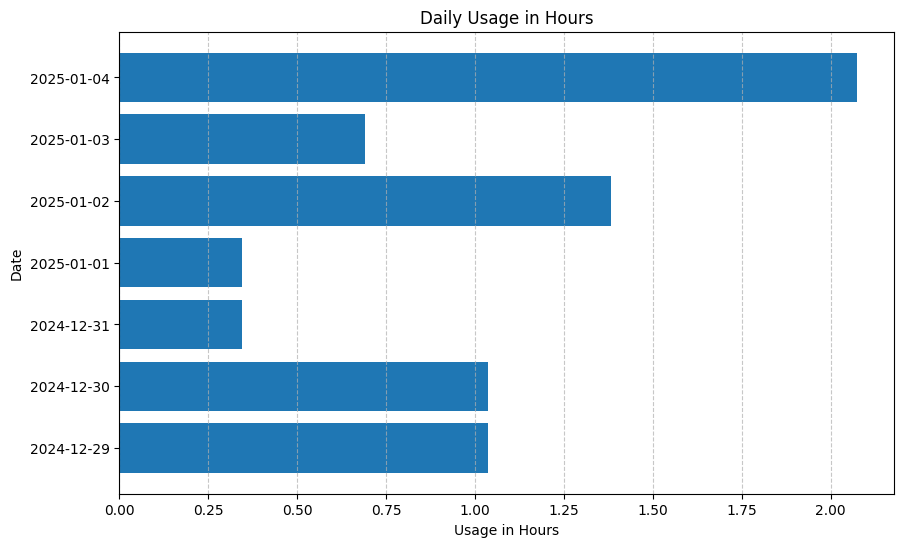

In [24]:
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date from the timestamp
df['date'] = df['timestamp'].dt.date

# Calculate total usage in hours per day
usage_hours = df.groupby('date').size().reset_index(name='usage_seconds')
usage_hours['usage_hours'] = usage_hours['usage_seconds'] / 3600

plt.figure(figsize=(10, 6))
plt.barh(usage_hours['date'].astype(str), usage_hours['usage_hours'])
plt.xlabel('Usage in Hours')
plt.ylabel('Date')
plt.title('Daily Usage in Hours')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

**Save data into JSON format**

In [25]:
import json

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date from the timestamp
df['date'] = df['timestamp'].dt.date

# Calculate total usage per day (1 row = 1 second)
usage_per_day = df.groupby('date').size().reset_index(name='usage_seconds')

# Convert to list of dictionaries for JSON
usage_list = usage_per_day.to_dict(orient='records')

json_data = [{"date": str(entry['date']), "usage_hours": round(entry['usage_seconds'] / 3600, 2)} for entry in usage_list]
with open("monitor_usage_2.json", "w") as json_file:
    json.dump(json_data, json_file, indent=4)
